Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
print('Кириловских Валерия Вадимовна')

Кириловских Валерия Вадимовна


## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


# функция для отправки запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# отчистка данных
def clear_data(data):
    # определение даты
    current_date = datetime.today().date()
    day = current_date.day
    month = current_date.month
    current_date = f'{day}.{month}'

    # определение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # определение погодных условии
    weather_code = data['current']['weather_code']
    bad_weather = [51, 53, 55, 61, 63, 65, 71, 73, 75, 80, 81, 82 ]
    if weather_code in [0, 1]:
        message = 'нет осадков, ясно'
    elif weather_code == 45:
        message = 'нет осадков, туман'
    elif weather_code in bad_weather:
        message = 'осадки, без тумана'
    else:
        message = 'посмотри в окно'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {message}'

    return message


# основная функция
def main():
    coordinates = input('Введите ваши координаты:\n').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши координаты:
50, 63
Сегодня (17.11) погода -2.6 °C, нет осадков, ясно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


#функция отправки запроса
def send_request(url):
    response = requests.get(url)

    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None

#функция для извлечения и вывода имен покемонов
def name20(url1):
    n=[]
    np=[]
    for x in send_request(url1).keys():
        if x=='results':
          n=send_request(url1)[x]
    for baze in n:
        for name_pokemon in baze.keys():
            if name_pokemon=='name':
                np.append(baze['name'])
    return np

#функция для извлечения и вывода данных по номеру покемона
def information(url2):
    inf=['types', 'weight','height','abilities']
    res={}
    res['name']=pokemon
    abilities=[]
    typep=[]
    for x in send_request(url2).keys():
        if x in inf:
            res[x]=send_request(url2)[x]
    typep=res['types'][0]['type']['name']
    res['types']=typep
    for y in range(len(res['abilities'])):
        abilities.append(res['abilities'][y]['ability']['name'])
    res['abilities']=abilities
    return res


def main1():
    step=send_request(url1)
    print(name20(url1))


def main2():
    step=send_request(url2)
    print(information(url2))

url1='https://pokeapi.co/api/v2/pokemon'
main1()
pokemon=input('Имя покемона:')
url2=f'https://pokeapi.co/api/v2/pokemon/{pokemon}'
main2()

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
Имя покемона:squirtle
{'name': 'squirtle', 'abilities': ['torrent', 'rain-dish'], 'height': 5, 'types': 'water', 'weight': 90}


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


#функция отправки запроса и возврата списка постов
def send_requestpost(url):
    final = []
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200 :
       result = response.json()
       for key in result:
              final.append(key['title'])
    if len(final) != 0:
        return final
    return None


#функция для отправки запроса и возврата всех данных о посте по его ID
def send_requestID(url,ID):
    response=requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        result=response.json()
        for key in result:
            if key['id'] == ID:
                return key
    return None


#функция для обработки предыдущей функции и вывода важной информации
def IDredaction(url,ID):
    if send_requestID(url,ID) != None:
        print(send_requestID(url,ID)['title'], send_requestID(url,ID)['body'])
    else:
        print('Поста с таким айди не существует')

url = 'https://jsonplaceholder.typicode.com/posts'
ID = int(input('Введите номер айди поста:'))
IDredaction(url,ID)

Введите номер айди поста:10
optio molestias id quia eum quo et expedita modi cum officia vel magni
doloribus qui repudiandae
vero nisi sit
quos veniam quod sed accusamus veritatis error


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests

#функция для создания нового поста
def create_post():
    title = input("Введите заголовок: ")
    body = input("Введите содержимое поста: ")
    user_id = input("Введите ID пользователя: ")

    payload = {
        "title": title,
        "body": body,
        "userId": user_id
    }

    response = requests.post(BASE_URL, json=payload)
    if response.status_code == 201:
        print("Пост успешно создан!")
        return response.json()
    else:
        print("Ошибка при создании поста!")
        return None


#функция для обновления поста
def update_post(post_id):
    new_title = input("Введите новый заголовок: ")
    new_body = input("Введите новое содержимое: ")

    payload = {
        "title": new_title,
        "body": new_body,
        "userId": 1  # userId можно указать любой, так как это не влияет на обновление
    }

    url = f"{BASE_URL}/{post_id}"
    response = requests.put(url, json=payload)

    if response.status_code == 200:
        print("Пост успешно обновлён!")
        return response.json()
    else:
        print("Ошибка при обновлении поста!")
        return None


#функция для удаления поста
def delete_post(post_id):
    url = f"{BASE_URL}/{post_id}"
    response = requests.delete(url)

    if response.status_code == 200:
        print("Пост успешно удалён!")
    else:
        print("Ошибка при удалении поста!")

    return response.status_code

BASE_URL = "https://jsonplaceholder.typicode.com/posts"

if __name__ == "__main__":
    while True:
        print("\nВыберите действие:")
        print("1. Создать пост")
        print("2. Обновить пост")
        print("3. Удалить пост")
        print("4. Выход")

        choice = input("Ваш выбор: ")

        if choice == "1":
            post = create_post()
            if post:
                print("Созданный пост:", post)

        elif choice == "2":
            post_id = input("Введите ID поста для обновления: ")
            updated_post = update_post(post_id)
            if updated_post:
                print("Обновлённый пост:", updated_post)

        elif choice == "3":
            post_id = input("Введите ID поста для удаления: ")
            status_code = delete_post(post_id)
            print("Статус-код ответа:", status_code)

        elif choice == "4":
            print("Выход из программы.")
            break

        else:
            print("Неверный выбор, попробуйте снова.")


Выберите действие:
1. Создать пост
2. Обновить пост
3. Удалить пост
4. Выход
Ваш выбор: 1
Введите заголовок: 1
Введите содержимое поста: Дети болеющие раком бегут марафон 20км
Введите ID пользователя: 10
Пост успешно создан!
Созданный пост: {'title': '1', 'body': 'Дети болеющие раком бегут марафон 20км', 'userId': '10', 'id': 101}

Выберите действие:
1. Создать пост
2. Обновить пост
3. Удалить пост
4. Выход
Ваш выбор: 3
Введите ID поста для удаления: 45
Пост успешно удалён!
Статус-код ответа: 200

Выберите действие:
1. Создать пост
2. Обновить пост
3. Удалить пост
4. Выход
Ваш выбор: 2
Введите ID поста для обновления: 65
Введите новый заголовок: пквкпкрем
Введите новое содержимое: рпвпкп
Пост успешно обновлён!
Обновлённый пост: {'title': 'пквкпкрем', 'body': 'рпвпкп', 'userId': 1, 'id': 65}

Выберите действие:
1. Создать пост
2. Обновить пост
3. Удалить пост
4. Выход
Ваш выбор: 4
Выход из программы.


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Список всех пород собак:
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
7

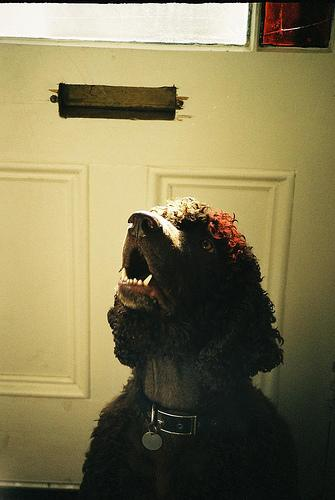

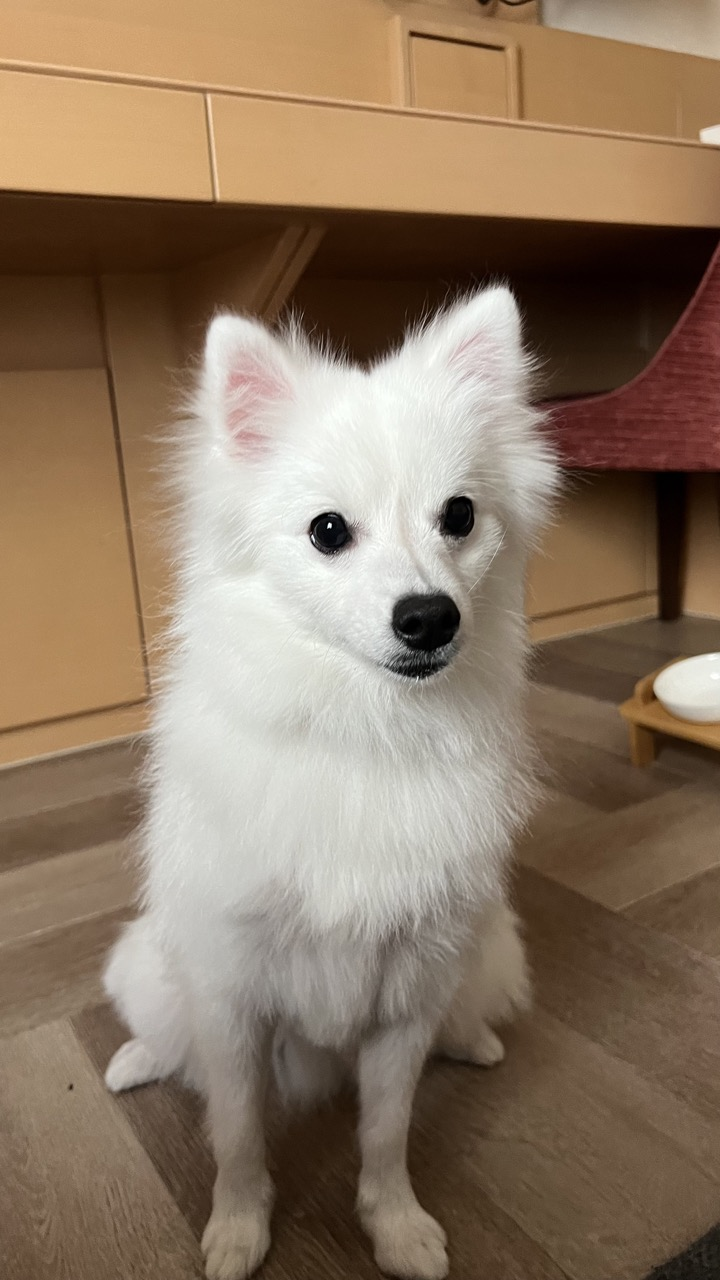

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


#Отправляем запрос, получаем список пород собак
def get_breeds():
    response = requests.get(f"{BASE_URL}/breeds/list/all")
    if response.status_code == 200:
        breeds = response.json()['message']
        print("Список всех пород собак:")
        for index, breed in enumerate(breeds.keys(), start=1):
            print(f"{index}. {breed}")
        return breeds.keys()  # Возвращаем список пород для последующего использования
    else:
        print("Ошибка при получении списка пород.")
        return []


#получаем и выводим фото пород
def get_dog_images(breeds):
    for breed in breeds:
        if breed in all_breeds:
            response = requests.get(f"{BASE_URL}/breed/{breed}/images/random")
            if response.status_code == 200:
                image_url = response.json()['message']
                res = requests.get(image_url)
                img = Image.open(io.BytesIO(res.content))
                display(img)
            else:
                print(f"Ошибка при получении изображения для породы: {breed}")
        else:
            print(f"Порода '{breed}' не найдена.")

BASE_URL = "https://dog.ceo/api"

# Получаем список всех пород
all_breeds = get_breeds()

# Ввод пород от пользователя
user_input = input("Введите породы собак через запятую: ")
entered_breeds = [breed.strip() for breed in user_input.split(',')]

# Получаем и отображаем изображения собак
get_dog_images(entered_breeds)